<a href="https://colab.research.google.com/github/gustavoramos82/Analise-Seguran-a-S-o-Paulo/blob/main/EDA_seguran%C3%A7a_s%C3%A3o_paulo_roubo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da segurança de São Paulo

Neste notebook será feito uma análise dos dados de segurança do Estado de São Paulo obtida a partir do site base de dados (que pode ser obtido [aqui](https://basedosdados.org/dataset/dbd717cb-7da8-4efd-9162-951a71694541?table=a2e9f998-e2c2-49b7-858a-ae1daef46dc0)) o objetivo é anlisar os seguintes casos:

- Roubo de veiculo
- Roubo a banco
- Roubo a carga



In [1]:
!pip install basedosdados #instalando a blibioteca de onde vai retirar os dados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
seg = bd.read_table(dataset_id='br_sp_gov_ssp',
table_id='ocorrencias_registradas',
billing_project_id="191635027716")
seg.head()

Downloading: 100%|██████████| 153876/153876 [00:28<00:00, 5390.40rows/s]


,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2006,1,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,16,0
1,2006,2,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,18,1
2,2006,3,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,22,0
3,2006,4,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,26,0
4,2006,5,3500105,Presidente Prudente,0,0,0,0,1,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,17,1


In [4]:
seg.columns

Index(['ano', 'mes', 'id_municipio', 'regiao_ssp', 'homicidio_doloso',
       'numero_de_vitimas_em_homicidio_doloso',
       'homicidio_doloso_por_acidente_de_transito',
       'numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito',
       'homicidio_culposo_por_acidente_de_transito',
       'homicidio_culposo_outros', 'tentativa_de_homicidio',
       'lesao_corporal_seguida_de_morte', 'lesao_corporal_dolosa',
       'lesao_corporal_culposa_por_acidente_de_transito',
       'lesao_corporal_culposa_outras', 'latrocinio',
       'numero_de_vitimas_em_latrocinio', 'total_de_estupro', 'estupro',
       'estupro_de_vulneravel', 'total_de_roubo_outros', 'roubo_outros',
       'roubo_de_veiculo', 'roubo_a_banco', 'roubo_de_carga', 'furto_outros',
       'furto_de_veiculo'],
      dtype='object')

In [5]:
seg_roubo = seg[['ano','mes','id_municipio','regiao_ssp','roubo_de_veiculo','roubo_a_banco',
                 'roubo_de_carga']] # Selecionando as colunas que serão utilizadas
seg_roubo.head()

,ano,mes,id_municipio,regiao_ssp,roubo_de_veiculo,roubo_a_banco,roubo_de_carga
0,2006,1,3500105,Presidente Prudente,0,0,0
1,2006,2,3500105,Presidente Prudente,0,0,0
2,2006,3,3500105,Presidente Prudente,0,0,0
3,2006,4,3500105,Presidente Prudente,0,0,0
4,2006,5,3500105,Presidente Prudente,0,0,0


## Análise Geral

Fazendo um agrupamento por ano e mês para fazer uma análise mais geral

In [6]:
seg_roubo_ano = seg_roubo.groupby(by=['ano','mes']).sum().reset_index()
seg_roubo_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ano               240 non-null    Int64
 1   mes               240 non-null    Int64
 2   roubo_de_veiculo  240 non-null    Int64
 3   roubo_a_banco     240 non-null    Int64
 4   roubo_de_carga    240 non-null    Int64
dtypes: Int64(5)
memory usage: 10.7 KB


In [7]:
seg_roubo_ano.head()

,ano,mes,roubo_de_veiculo,roubo_a_banco,roubo_de_carga
0,2002,1,7800,9,304
1,2002,2,7450,16,303
2,2002,3,8244,9,326
3,2002,4,7992,8,327
4,2002,5,7622,21,324


Text(0, 0.5, '')

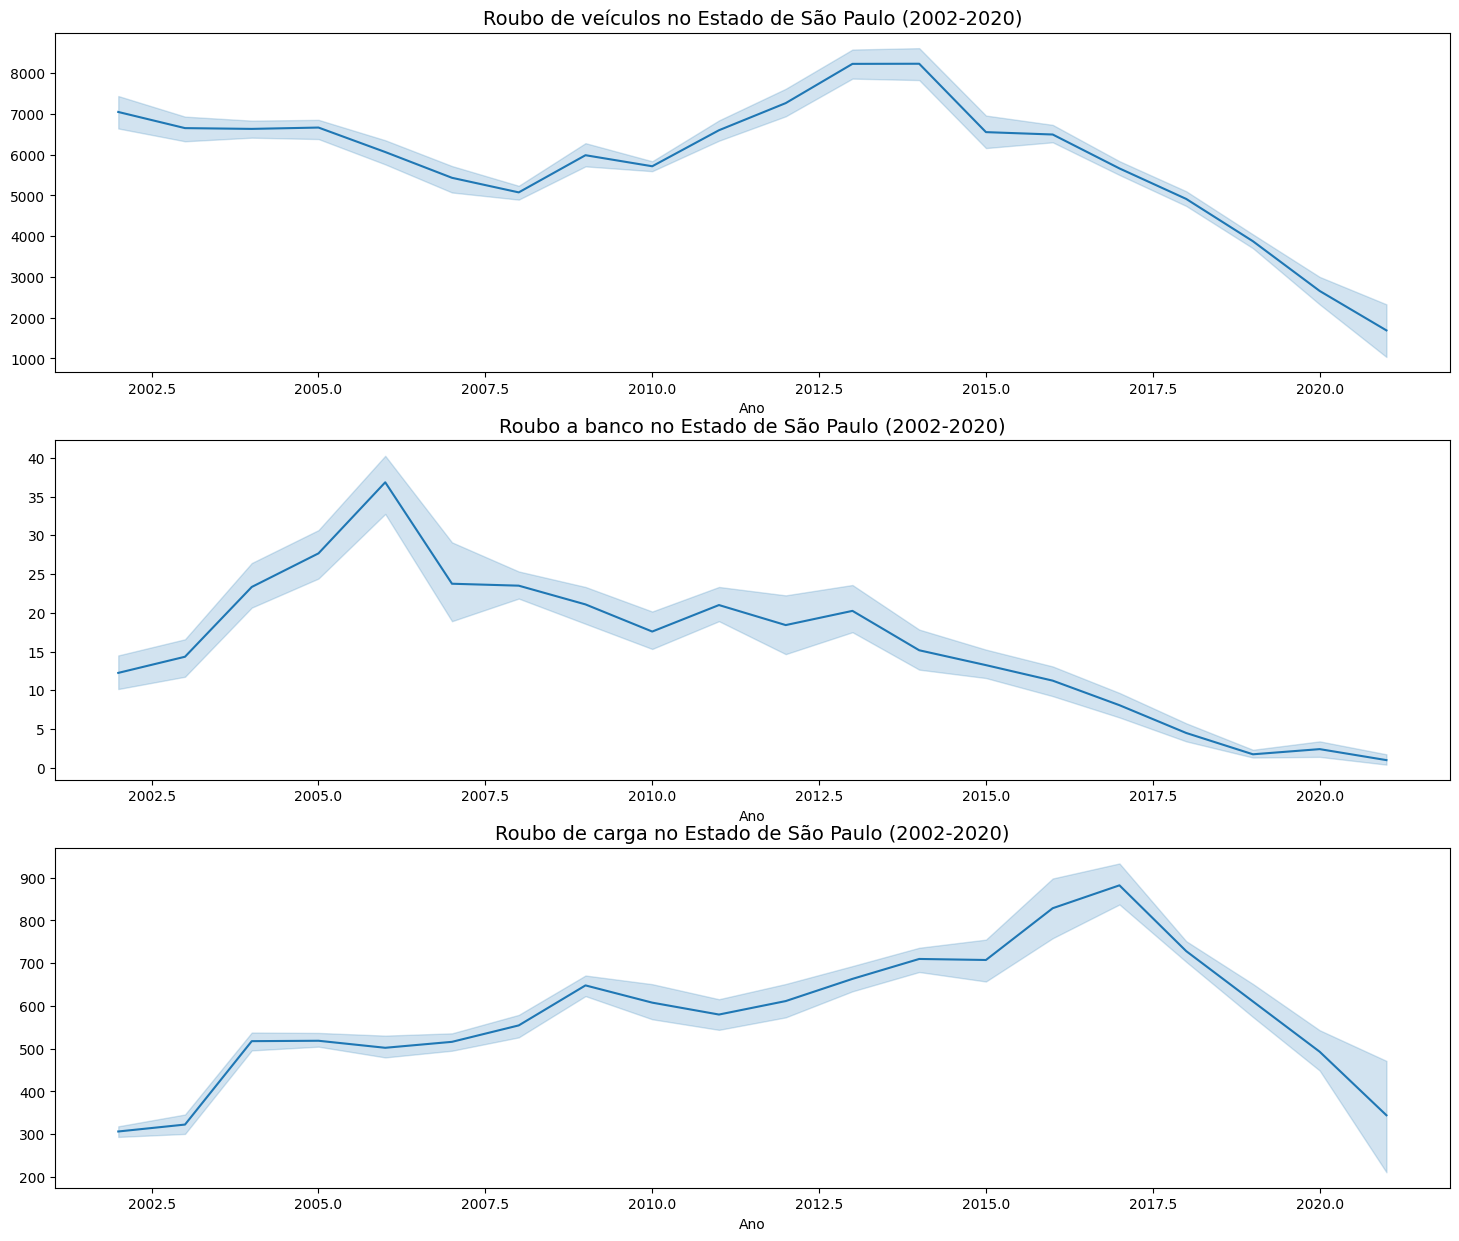

In [8]:
plt.figure(figsize=(18,15))

plt.subplot(3,1,1)
plt.title('Roubo de veículos no Estado de São Paulo (2002-2020)',
          fontsize=14)
sns.lineplot(x=list(seg_roubo_ano['ano']),y='roubo_de_veiculo',data=seg_roubo_ano)
plt.xlabel('Ano')
plt.ylabel('')

plt.subplot(3,1,2)
plt.title('Roubo a banco no Estado de São Paulo (2002-2020)',
          fontsize=14)
sns.lineplot(x=list(seg_roubo_ano['ano']),y='roubo_a_banco',data=seg_roubo_ano)
plt.xlabel('Ano')
plt.ylabel('')

plt.subplot(3,1,3)
plt.title('Roubo de carga no Estado de São Paulo (2002-2020)',
          fontsize=14)
sns.lineplot(x=list(seg_roubo_ano['ano']),y='roubo_de_carga',data=seg_roubo_ano)
plt.xlabel('Ano')
plt.ylabel('')

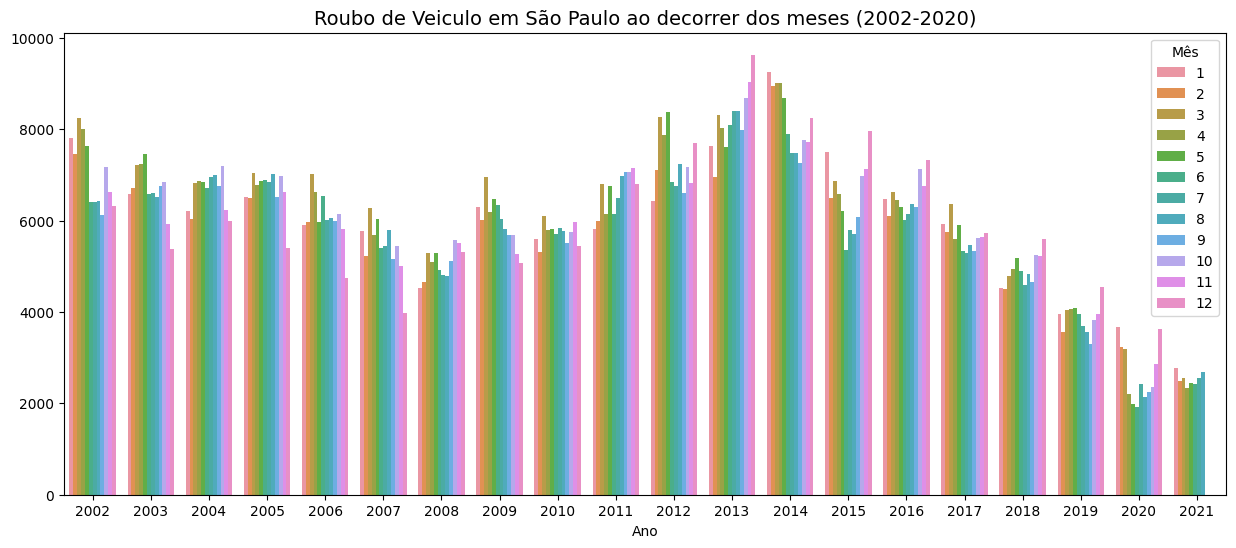

In [9]:
plt.figure(figsize=(15,6))
plt.title('Roubo de Veiculo em São Paulo ao decorrer dos meses (2002-2020)',
          fontsize=14)
sns.barplot(x='ano',y='roubo_de_veiculo',data=seg_roubo_ano,hue='mes')
plt.xlabel('Ano')
plt.ylabel('')
plt.legend(title='Mês')

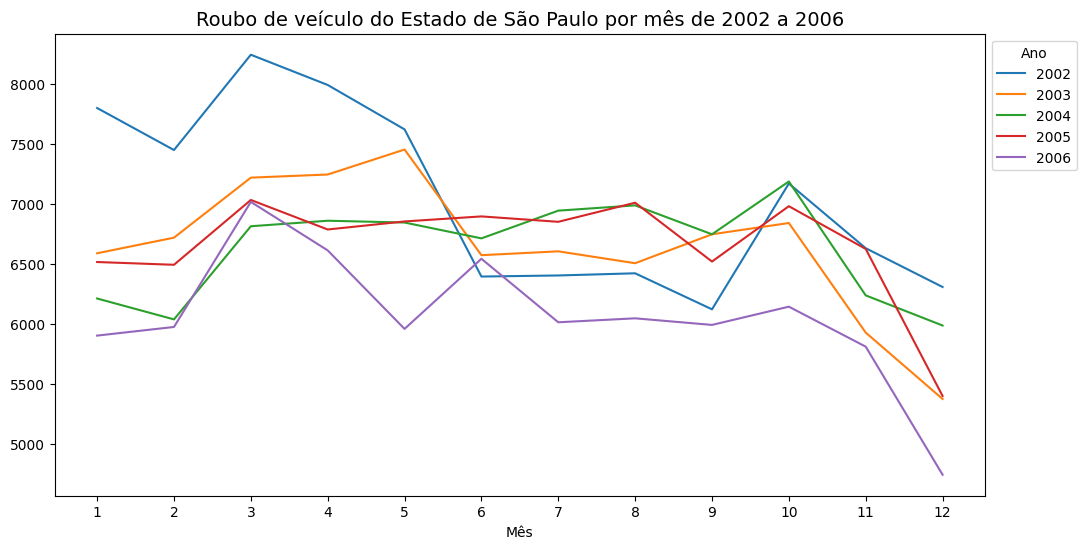

In [39]:
plt.figure(figsize=(12,6))
plt.title('Roubo de veículo do Estado de São Paulo por mês de 2002 a 2006',
          fontsize=14)
sns.lineplot(x=seg_roubo_ano[seg_roubo_ano['ano']<2007]['mes'].astype(str),y='roubo_de_veiculo',
             data=seg_roubo_ano[seg_roubo_ano['ano']<2007],
             hue=seg_roubo_ano[seg_roubo_ano['ano']<2007]['ano'].astype(str))
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')


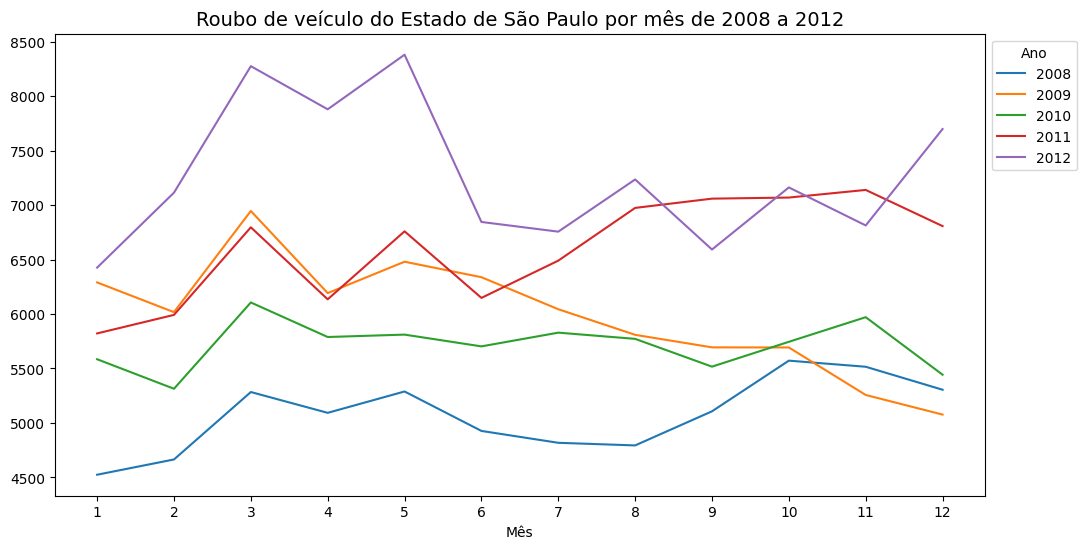

In [41]:
plt.figure(figsize=(12,6))
plt.title('Roubo de veículo do Estado de São Paulo por mês de 2008 a 2012',
          fontsize=14)
sns.lineplot(x=seg_roubo_ano[(seg_roubo_ano['ano']>2007)&(seg_roubo_ano['ano']<2013)]['mes'].astype(str),y='roubo_de_veiculo',
             data=seg_roubo_ano[(seg_roubo_ano['ano']>2007)&(seg_roubo_ano['ano']<2013)],
             hue=seg_roubo_ano[(seg_roubo_ano['ano']>2007)&(seg_roubo_ano['ano']<2013)]['ano'].astype(str))
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')

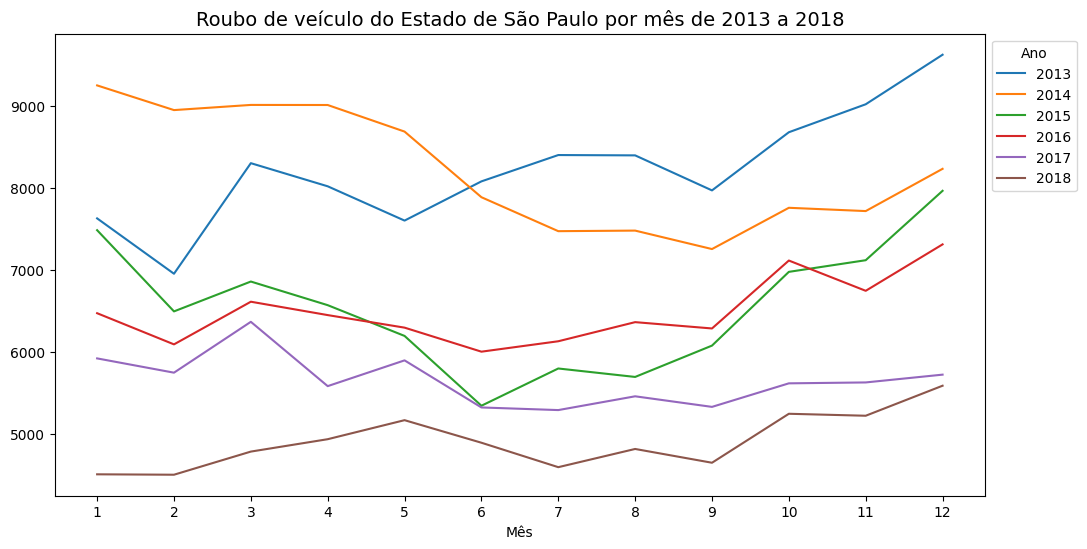

In [43]:
plt.figure(figsize=(12,6))
plt.title('Roubo de veículo do Estado de São Paulo por mês de 2013 a 2018',
          fontsize=14)
sns.lineplot(x=seg_roubo_ano[(seg_roubo_ano['ano']>2012)&(seg_roubo_ano['ano']<2019)]['mes'].astype(str),y='roubo_de_veiculo',
             data=seg_roubo_ano[(seg_roubo_ano['ano']>2012)&(seg_roubo_ano['ano']<2019)],
             hue=seg_roubo_ano[(seg_roubo_ano['ano']>2012)&(seg_roubo_ano['ano']<2019)]['ano'].astype(str))
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')

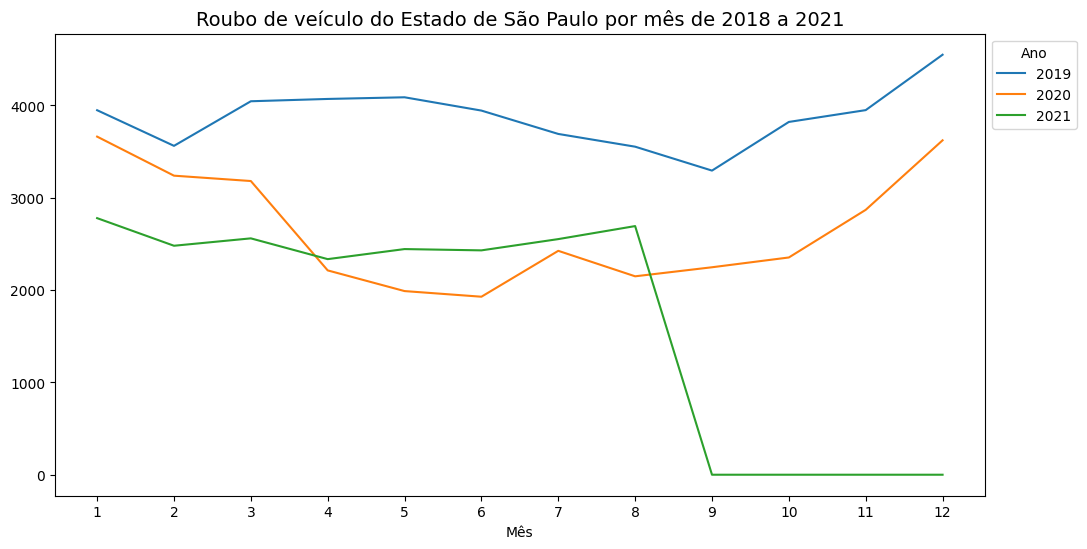

In [44]:
plt.figure(figsize=(12,6))
plt.title('Roubo de veículo do Estado de São Paulo por mês de 2018 a 2021',
          fontsize=14)
sns.lineplot(x=seg_roubo_ano[seg_roubo_ano['ano']>2018]['mes'].astype(str),y='roubo_de_veiculo',
             data=seg_roubo_ano[seg_roubo_ano['ano']>2018],
             hue=seg_roubo_ano[seg_roubo_ano['ano']>2018]['ano'].astype(str))
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')

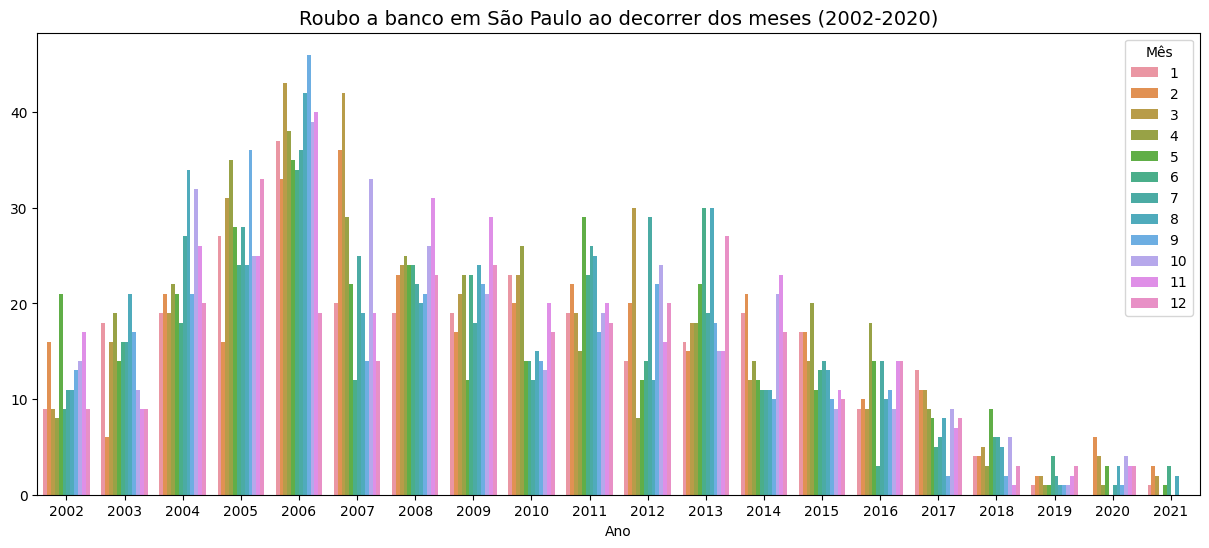

In [10]:
plt.figure(figsize=(15,6))
plt.title('Roubo a banco em São Paulo ao decorrer dos meses (2002-2020)',
          fontsize=14)
sns.barplot(x='ano',y='roubo_a_banco',data=seg_roubo_ano,hue='mes')
plt.xlabel('Ano')
plt.ylabel('')
plt.legend(title='Mês')

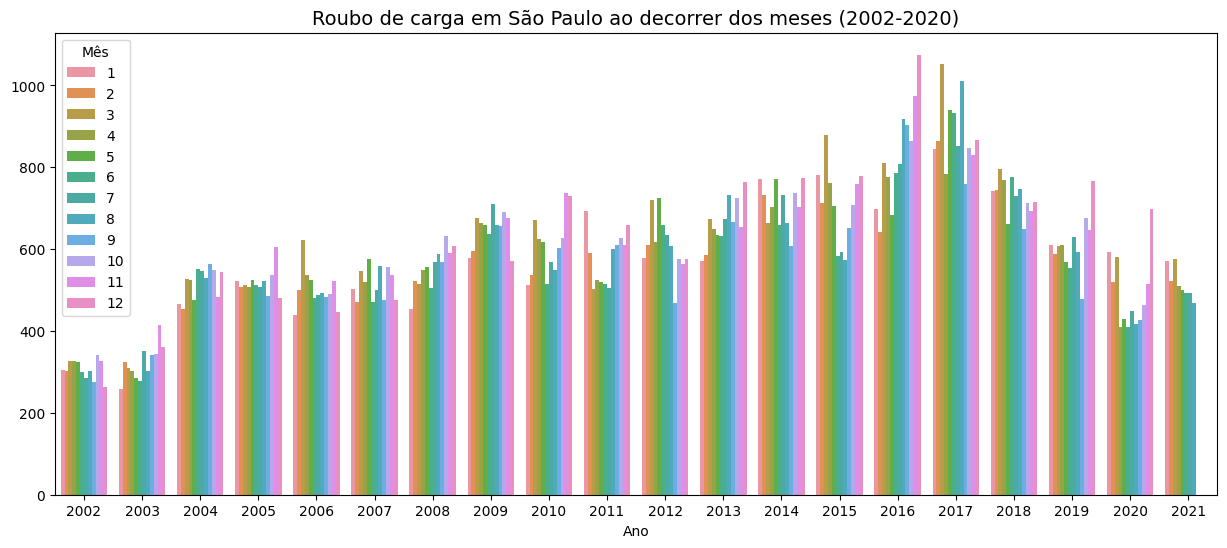

In [11]:
plt.figure(figsize=(15,6))
plt.title('Roubo de carga em São Paulo ao decorrer dos meses (2002-2020)',
          fontsize=14)
sns.barplot(x='ano',y='roubo_de_carga',data=seg_roubo_ano,hue='mes')
plt.xlabel('Ano')
plt.ylabel('')
plt.legend(title='Mês')

### Análise por Região

In [12]:
seg_ano_cid = seg_roubo.groupby(by=['ano','regiao_ssp']).sum().reset_index()
seg_ano_cid.drop('mes',axis=1,inplace=True)
seg_ano_cid.head(10)

,ano,regiao_ssp,roubo_de_veiculo,roubo_a_banco,roubo_de_carga
0,2002,Araçatuba,104,2,5
1,2002,Bauru,177,0,53
2,2002,Campinas,7387,9,224
3,2002,Capital,43621,55,1850
4,2002,Grande São Paulo (exclui a Capital),25823,26,896
5,2002,Piracicaba,2556,9,235
6,2002,Presidente Prudente,57,0,12
7,2002,Ribeirão Preto,647,4,82
8,2002,Santos,968,8,149
9,2002,Sorocaba,1480,2,86


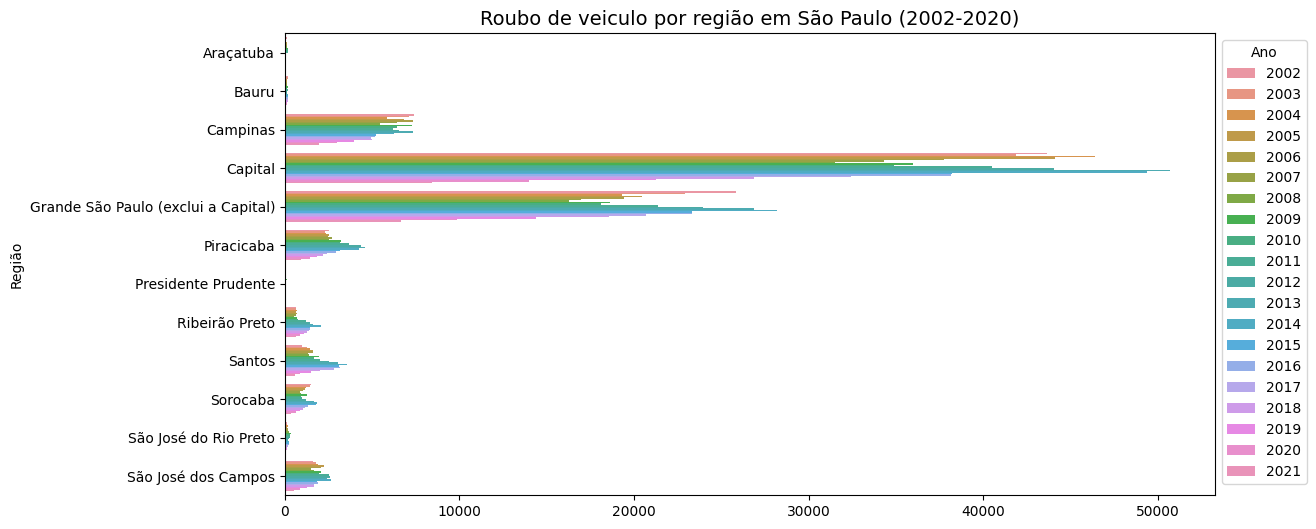

In [13]:
plt.figure(figsize=(12,6))
plt.title('Roubo de veiculo por região em São Paulo (2002-2020)',
          fontsize=14)
sns.barplot(y='regiao_ssp',x='roubo_de_veiculo',data=seg_ano_cid,hue='ano')
plt.xlabel('')
plt.ylabel('Região')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')

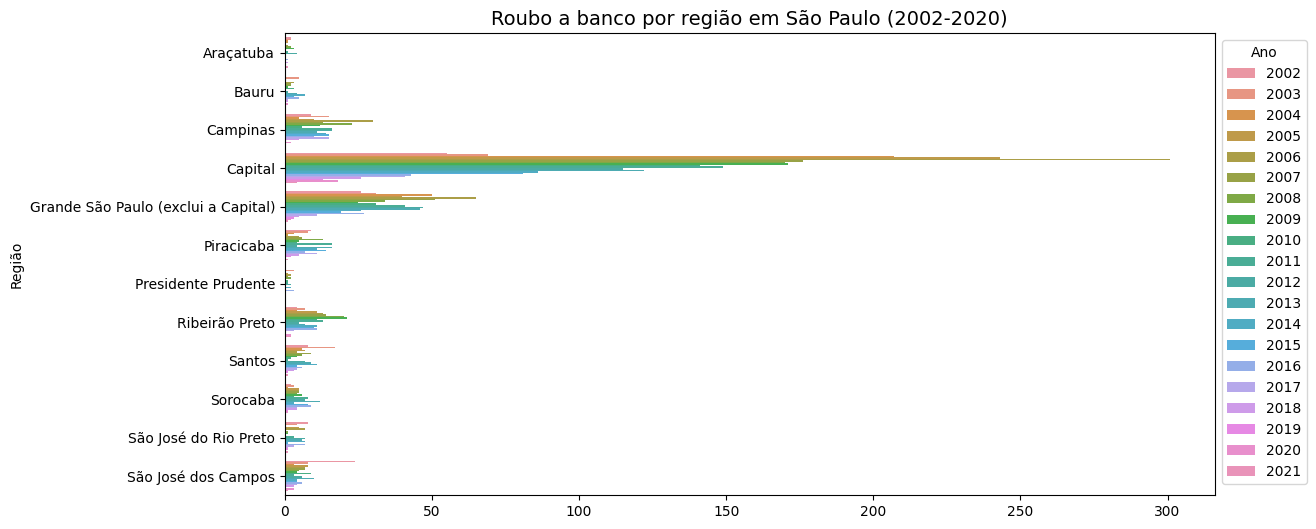

In [14]:
plt.figure(figsize=(12,6))
plt.title('Roubo a banco por região em São Paulo (2002-2020)',
          fontsize=14)
sns.barplot(y='regiao_ssp',x='roubo_a_banco',data=seg_ano_cid,hue='ano')
plt.xlabel('')
plt.ylabel('Região')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')

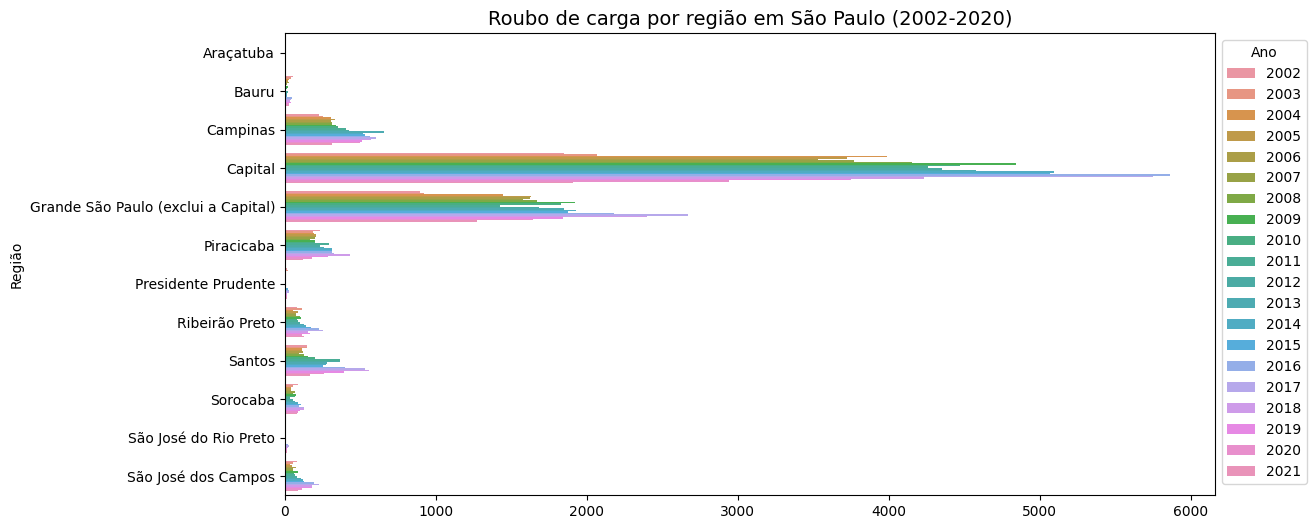

In [15]:
plt.figure(figsize=(12,6))
plt.title('Roubo de carga por região em São Paulo (2002-2020)',
          fontsize=14)
sns.barplot(y='regiao_ssp',x='roubo_de_carga',data=seg_ano_cid,hue='ano')
plt.xlabel('')
plt.ylabel('Região')
plt.legend(bbox_to_anchor=(1, 1), loc=2,title='Ano')